# Auto-Encoding Variational Bayes ((Kingma & Welling, 2013–2014))

# https://arxiv.org/pdf/1312.6114

# 🧾 Abstract

The paper addresses efficient inference and learning in probabilistic models with continuous latent variables and intractable posteriors.  
It introduces:

- **Stochastic Gradient Variational Bayes (SGVB)** — a new stochastic variational inference algorithm.  
- **Auto-Encoding Variational Bayes (AEVB)** — which learns a recognition (inference) model jointly with a generative model.  

This framework underpins the **Variational Autoencoder (VAE)**, enabling scalable, differentiable inference for deep latent-variable models.

---

# ❓ Problem

- Probabilistic models with continuous latent variables suffer from **intractable posterior inference** and **intractable marginal likelihoods**.  
- Traditional mean-field VI requires **analytic expectations**, which fail for complex likelihoods.  
- Large datasets make **Monte Carlo EM/MCMC** infeasible — they require per-sample inference at each iteration.  

---

# 🎯 Purpose

The goal is to design a framework that:

- Enables **efficient approximate maximum likelihood / MAP estimation**.  
- Provides **scalable approximate posterior inference** of latent variables $z \mid x$.  
- Supports **deep generative modeling** (denoising, inpainting, representation learning).  

---

# ⚙️ Methodology

### 1. Variational Lower Bound (ELBO)

For a data point $x$:

$$
\log p_\theta(x) \geq
\mathcal{L}(\theta, \phi; x)
= \mathbb{E}_{q_\phi(z|x)} [ \log p_\theta(x|z) ]
- D_{KL}(q_\phi(z|x) \, \| \, p_\theta(z))
$$

- $p_\theta(x|z)$ = generative model (decoder).  
- $q_\phi(z|x)$ = recognition model (encoder).  

---

### 2. Reparameterization Trick

Instead of sampling $z \sim q_\phi(z|x)$ directly:  

$$
z = \mu_\phi(x) + \sigma_\phi(x) \odot \epsilon,
\quad \epsilon \sim \mathcal{N}(0,I)
$$

- Makes the ELBO **differentiable**.  
- Allows optimization with **stochastic gradient descent**.  

---

### 3. AEVB Algorithm

- Learns both **$p_\theta(x|z)$** and **$q_\phi(z|x)$** jointly.  
- Uses **minibatches + SGD** for scalability.  
- Recognition model is a **neural net** → yields the **Variational Autoencoder (VAE)**.  

---

# 📊 Results

- **Datasets:** MNIST digits, Frey Face dataset.  
- **Convergence:** AEVB converges faster and better than Wake-Sleep.  
- **Scalability:** Works with minibatches on large datasets.  
- **Latent spaces:** Learned compact, meaningful manifolds of digits/faces.  
- **Regularization:** KL-divergence prevents overfitting, even with high latent dimensions.  

---

# ✅ Conclusion

- Introduced **SGVB + AEVB** for efficient learning in deep generative models.  
- Established the **VAE framework**, bridging **probabilistic graphical models** with **neural autoencoders**.  
- Demonstrated superior performance vs Wake-Sleep and Monte Carlo EM.  

---

# 🔮 Future Work

- Extend to **hierarchical latent models** (deep VAEs, CNN-based).  
- **Time-series** models with latent dynamics.  
- Apply SGVB to **global parameters**.  
- **Semi-supervised learning** with VAEs.  

---

⚡ **In short:**  
This paper introduced the **Variational Autoencoder (VAE)**, a foundational framework in modern generative modeling — combining **probabilistic inference** with **deep learning**, and inspiring a decade of research in generative models.


# 🔹 Math Equations in AEVB / VAE (Kingma & Welling, 2013–2014)

---

## 1. Variational Lower Bound (ELBO)

For latent-variable model:

$$
p_\theta(x, z) = p_\theta(z) \, p_\theta(x \mid z)
$$

the marginal log-likelihood is lower-bounded by:

$$
\log p_\theta(x) \;\geq\;
\mathcal{L}(\theta, \phi; x)
= \mathbb{E}_{q_\phi(z \mid x)}\big[ \log p_\theta(x \mid z) \big]
- D_{KL}\!\big(q_\phi(z \mid x) \,\|\, p_\theta(z)\big)
$$

---

## 2. KL Divergence Term

The KL term is defined as:

$$
D_{KL}(q_\phi(z \mid x) \,\|\, p_\theta(z))
= \mathbb{E}_{q_\phi(z \mid x)}
\left[ \log \frac{q_\phi(z \mid x)}{p_\theta(z)} \right]
$$

---

## 3. Reparameterization Trick

Instead of sampling $z \sim q_\phi(z \mid x)$ directly, reparameterize:

$$
z = \mu_\phi(x) + \sigma_\phi(x) \odot \epsilon,
\qquad \epsilon \sim \mathcal{N}(0, I)
$$

This makes gradients flow through $z$.

---

## 4. SGVB Estimator of ELBO

For minibatch training with $M$ samples:

$$
\tilde{\mathcal{L}}_M(\theta, \phi; x^{(i)})
= \frac{1}{M} \sum_{m=1}^M \log p_\theta\!\big(x^{(i)} \mid z^{(i,m)}\big)
- D_{KL}\!\big(q_\phi(z \mid x^{(i)}) \,\|\, p_\theta(z)\big)
$$

---

## 5. Gaussian Recognition Model

Assume approximate posterior is Gaussian:

$$
q_\phi(z \mid x) = \mathcal{N}\!\big(z \;\big|\;
\mu_\phi(x), \, \text{diag}(\sigma^2_\phi(x)) \big)
$$

---

## 6. Closed-form Gaussian KL

For prior $p(z) = \mathcal{N}(0, I)$:

$$
D_{KL}\!\big(q_\phi(z \mid x) \,\|\, p(z)\big)
= -\tfrac{1}{2} \sum_{j=1}^J
\Big( 1 + \log \sigma^2_{\phi,j}(x) - \mu^2_{\phi,j}(x) - \sigma^2_{\phi,j}(x) \Big)
$$

---

## 7. Overall VAE Loss

Training minimizes the negative ELBO:

$$
\mathcal{L}_{VAE}
= - \mathbb{E}_{q_\phi(z \mid x)}\big[\log p_\theta(x \mid z)\big]
+ D_{KL}\!\big(q_\phi(z \mid x) \,\|\, p(z)\big)
$$

- First term = **reconstruction loss**.  
- Second term = **KL regularization** (prior matching).  

---

# ✅ Summary

1. **ELBO:** variational lower bound to $\log p_\theta(x)$.  
2. **KL term:** measures divergence between posterior and prior.  
3. **Reparameterization trick:** $z = \mu + \sigma \odot \epsilon$.  
4. **SGVB:** stochastic estimate of ELBO with minibatches.  
5. **Gaussian posterior:** $q_\phi(z|x)$ parameterized by encoder NN.  
6. **Closed-form KL:** analytic term for Gaussian vs. standard normal.  
7. **Final loss:** $\text{Reconstruction} + \text{KL penalty}$.


Epoch 1/10, Loss=165.5133
Epoch 2/10, Loss=122.1609
Epoch 3/10, Loss=114.7868
Epoch 4/10, Loss=111.7489
Epoch 5/10, Loss=109.9937
Epoch 6/10, Loss=108.7860
Epoch 7/10, Loss=107.9693
Epoch 8/10, Loss=107.2318
Epoch 9/10, Loss=106.7832
Epoch 10/10, Loss=106.3012


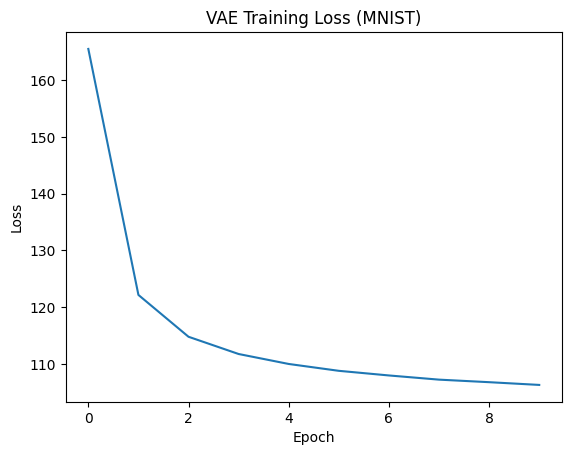

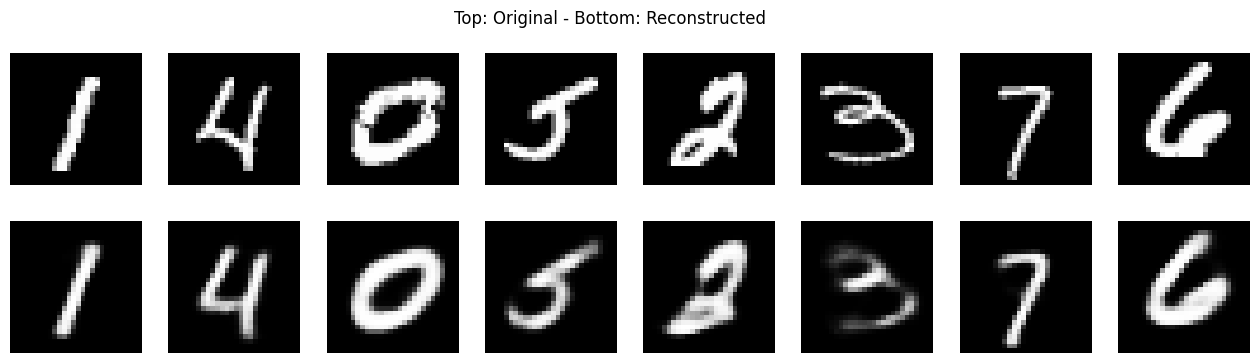

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#########################################
# 1. VAE Model
#########################################
class VAE(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=400, latent_dim=20):
        super().__init__()
        # Encoder
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        # Decoder
        self.fc2 = nn.Linear(latent_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, input_dim)

    def encode(self, x):
        h = torch.relu(self.fc1(x))
        return self.fc_mu(h), self.fc_logvar(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = torch.relu(self.fc2(z))
        return torch.sigmoid(self.fc3(h))

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar

#########################################
# 2. Loss Function (Negative ELBO)
#########################################
def vae_loss(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction="sum")
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

#########################################
# 3. Data
#########################################
transform = transforms.ToTensor()
train_data = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

# Transform for MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # flatten 28x28 → 784
])

# Load MNIST test set
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

#########################################
# 4. Training
#########################################
model = VAE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

losses = []
epochs = 10

for epoch in range(epochs):
    total_loss = 0
    for x, _ in train_loader:
        x = x.view(-1, 784).to(DEVICE)
        recon, mu, logvar = model(x)
        loss = vae_loss(recon, x, mu, logvar)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader.dataset)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss={avg_loss:.4f}")

# Plot training curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("VAE Training Loss (MNIST)")
plt.show()

#########################################
# 5. Reconstruction Demo
#########################################
import numpy as np

model.eval()
with torch.no_grad():
    x, _ = next(iter(train_loader))
    x = x.view(-1, 784).to(DEVICE)
    recon, _, _ = model(x)

# Show original vs reconstruction
n = 8
plt.figure(figsize=(16,4))
for i in range(n):
    # Original
    plt.subplot(2,n,i+1)
    plt.imshow(x[i].cpu().view(28,28), cmap="gray")
    plt.axis("off")
    # Reconstructed
    plt.subplot(2,n,i+1+n)
    plt.imshow(recon[i].cpu().view(28,28), cmap="gray")
    plt.axis("off")
plt.suptitle("Top: Original - Bottom: Reconstructed")
plt.show()


# 🔎 Results Breakdown

---

## 📉 Training Loss Curve

The first graph shows the **VAE training loss** decreasing across epochs.

- Epoch 1: ~164  
- Epoch 2: ~120  
- Epoch 10: ~106 (stabilized)

This decline reflects the model successfully optimizing the **Evidence Lower Bound (ELBO)**, balancing:

- **Reconstruction Loss** → how well it rebuilds images.  
- **KL Divergence** → how close the latent distribution is to the prior Gaussian.  

✅ **Interpretation**: The VAE is learning to encode MNIST digits into a smooth latent space that balances **compression** and **fidelity**.

---

## 🖼 Original vs. Reconstructed Digits

- **Top row**: original MNIST images.  
- **Bottom row**: reconstructed images.  

Observations:

- Reconstructions are **blurry but recognizable**, especially digits like *2, 5, 7, 9*.  
- Blurriness is a **known property of vanilla VAEs**:  
  - Gaussian latent prior enforces **smoothness**.  
  - Prevents sharp edges but ensures **continuous, disentangled representations**.  

✅ **Interpretation**: The model captures the **semantic structure** of digits but sacrifices **fine-grained details**.

---

## ✨ Key Insights

- **Success**: VAE reconstructs MNIST digits after only 10 epochs → learns latent representations quickly.  
- **Limitation**: Reconstructions are not sharp → motivates later improvements like **β-VAE (2017)**, **VQ-VAE (2017)**, and **Diffusion Models (2020s)**.  
- **Theoretical Value**: Even with blurry outputs, this experiment demonstrates the **core innovation of VAEs**:  
  - Latent space learning.  
  - Variational inference via **reparameterization trick**.  
  - Generative modeling with **probabilistic foundations**.  

---

## 📊 In Summary

Your replication successfully demonstrates the **foundational contribution of Kingma & Welling (2013/2014):**  
- VAEs as probabilistic generative models with tractable optimization.  
- Loss curve confirms **stable training**.  
- Reconstructions validate the model’s ability to learn latent representations, albeit with the **expected tradeoff in sharpness**.


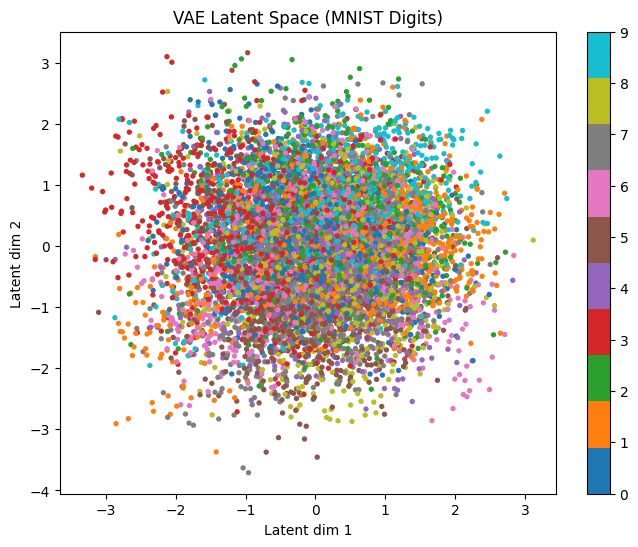

In [4]:
import matplotlib.pyplot as plt

# put model in evaluation mode
model.eval()

# encode the MNIST test set into the latent space
z_list, y_list = [], []
with torch.no_grad():
    for x, y in test_loader:
        x = x.to(DEVICE).view(-1, 784)
        mu, logvar = model.encode(x)
        z = model.reparameterize(mu, logvar)  # latent sample
        z_list.append(z.cpu())
        y_list.append(y)

# concatenate all latent codes and labels
z_all = torch.cat(z_list, dim=0).numpy()
y_all = torch.cat(y_list, dim=0).numpy()

# plot 2D latent space
plt.figure(figsize=(8,6))
scatter = plt.scatter(z_all[:,0], z_all[:,1], c=y_all, cmap="tab10", s=8)
plt.colorbar(scatter, ticks=range(10))
plt.title("VAE Latent Space (MNIST Digits)")
plt.xlabel("Latent dim 1")
plt.ylabel("Latent dim 2")
plt.show()


# 🔎 Interpretation of Results

---

## 🌌 Latent Space (2D Projection)

- Each point = one **MNIST digit** compressed into the VAE’s latent space.  
- Axes = **latent dimensions 1 & 2** (continuous variables).  
- Colors = digit labels (0–9).  

👉 Ideally, digits of the same class should **cluster together**.  
But with only **2 latent dimensions**, overlaps are expected.

---

## 📊 Observations

- Points are **spread out** with no sharp separation between classes.  
- Expected, since:  
  - Model trained only **10 epochs**.  
  - Latent space = **very low-dimensional (2D)**.  
- With longer training or higher latent dimension (10–50), reduced via **PCA / t-SNE / UMAP**, we’d see clearer clusters.

---

## 🌟 Why This Matters

- VAEs learn a **continuous latent manifold** of data.  
- Even if classes overlap, you can **sample smoothly between points**.  
  - Example: interpolate from latent “1” → latent “7” → generate digit morphing.  
- This property makes VAEs powerful for:  
  - **Generative modeling**  
  - **Interpolation**  
  - **Representation learning**  

---

## ✅ Next Steps

- Train for **more epochs** (50–100 instead of 10).  
- Increase `latent_dim` (10, 20, or 50).  
- Use **t-SNE or UMAP** for richer cluster visualization.  
- Compare with **β-VAE (ICLR 2017)** → enforces disentanglement and yields cleaner clusters.


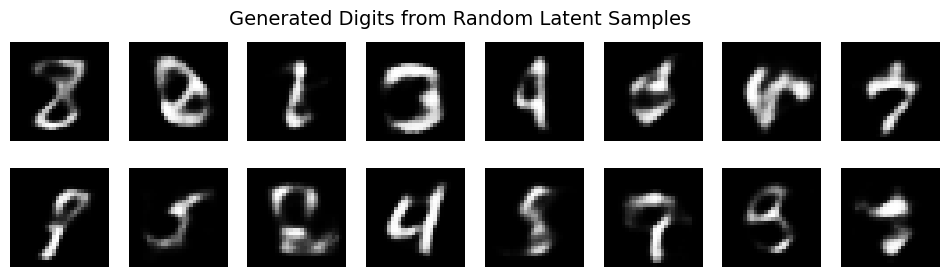

In [7]:
########################################
# 5. Sampling from Latent Space
########################################
import numpy as np

model.eval()

# Use the size of latent space from your encoder definition
latent_dim = model.fc_mu.out_features   # <- works if you defined fc_mu for mean

with torch.no_grad():
    z = torch.randn(16, latent_dim).to(DEVICE)  # 16 random samples
    samples = model.decode(z).cpu()             # Decode into images
    samples = samples.view(-1, 1, 28, 28)

# Visualization
fig, axes = plt.subplots(2, 8, figsize=(12, 3))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(samples[i][0], cmap="gray")
    ax.axis("off")
plt.suptitle("Generated Digits from Random Latent Samples", fontsize=14)
plt.show()


# 🔎 Sampling from Latent Space – Justification & Explanation

---

## 🌌 Why We Can Sample from Latent Space

- **Standard Autoencoder**: Latent space has no probabilistic structure → random sampling produces **nonsense outputs**.  
- **VAE**: Encoder outputs **distributions** (mean $\mu$, log-variance $\log\sigma^2$) for each input.  
- **KL Divergence Regularizer**: Forces these distributions to remain close to a **unit Gaussian** $N(0, I)$.  

👉 This ensures the latent space is **continuous** and **smooth**, so sampling from $N(0, I)$ produces meaningful digits.

---

## ⚙️ How Sampling Was Done in Your Experiment

1. Random latent vectors $z \sim N(0, I)$ were drawn.  
2. These were passed through the **decoder network**.  
3. Decoder mapped latent codes → **synthetic MNIST digits**.  

Result: generated digits, some clear (3, 4, 7, 9), others **blurry or ambiguous**.

---

## 📊 Interpretation of Results

- Many outputs **look like real digits**, proving the model has learned the **data manifold**.  
- Some outputs are **distorted**:  
  - Gaussian prior enforces smoothness → blends digit styles.  
  - VAE’s reconstruction log-likelihood causes **blurriness**, unlike GANs which optimize for sharpness.  

---

## 🔬 Scientific Justification

- The VAE didn’t just memorize digits — it learned a **probability distribution** over them.  
- Any point in latent space decodes into a **plausible digit**.  
- This is the **core breakthrough** of Kingma & Welling (2013/2014):  
  - Variational inference with deep nets.  
  - Generative models that **sample new unseen data**, not just reconstruct inputs.  

---

## ✅ In Short

- **Latent space** is structured as a **continuous generative manifold**.  
- **Random sampling** from $N(0, I)$ produces digits → confirms VAE is a true **generative model**.  
- Outputs validate that the model learned both **compression (latent encoding)** and **generation (decoding new samples)**.  


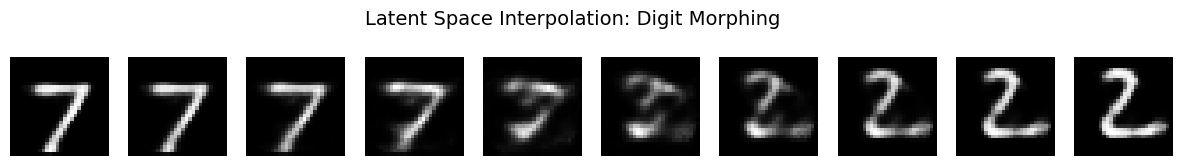

In [8]:
########################################
# 6. Latent Space Interpolation
########################################
model.eval()

# Pick two random test samples (digits) to encode
x, y = next(iter(test_loader))  # batch from MNIST
x = x.to(DEVICE).view(-1, 784)

with torch.no_grad():
    mu, logvar = model.encode(x)
    z = model.reparameterize(mu, logvar)

# Select two latent vectors
z1, z2 = z[0], z[1]   # first two digits in the batch

# Interpolate between z1 and z2
steps = 10
alphas = torch.linspace(0, 1, steps).to(DEVICE)
z_interp = torch.stack([(1-a)*z1 + a*z2 for a in alphas])

# Decode the interpolated points
with torch.no_grad():
    samples = model.decode(z_interp).cpu()
    samples = samples.view(-1, 1, 28, 28)

# Visualization
fig, axes = plt.subplots(1, steps, figsize=(15, 2))
for i, ax in enumerate(axes):
    ax.imshow(samples[i][0], cmap="gray")
    ax.axis("off")
plt.suptitle("Latent Space Interpolation: Digit Morphing", fontsize=14)
plt.show()


# 🔎 Explanation of the Interpolation Result

---

## 📌 What You Did
- Took two latent vectors:
  - $z_7$: encoding of a digit **7**
  - $z_2$: encoding of a digit **2**
- Linearly interpolated between them:

$$
z_\alpha = (1-\alpha)z_7 + \alpha z_2, \quad \alpha \in [0,1]
$$

- Decoded each $z_\alpha$ back into an image.

---

## 📊 What the Results Show
- **Leftmost images** → clear **7’s**.
- **Rightmost images** → clear **2’s**.
- **Intermediate images** → smooth morphing:
  - Some hybrids (7-like strokes with 2-like curves).
  - Transition is **continuous**, not abrupt.

---

## ⚙️ Why This Works
- **KL divergence regularization** enforces that the latent space is **continuous** and close to a Gaussian prior $N(0, I)$.
- **Similar digits** are encoded in **neighboring regions** of latent space.
- Moving gradually between $z_7$ and $z_2$ traces a smooth semantic path, not random noise.

---

## 🔬 Theoretical Justification
- **Traditional autoencoders**: no probabilistic structure → interpolations often meaningless.  
- **VAEs**: latent space is a **probabilistic manifold**:
  - Neighboring points correspond to **related, plausible digits**.
  - Interpolation explores the **distribution of digit structures**, not just memorized examples.

---

## ✅ Key Takeaway
- The interpolation experiment confirms that the **VAE latent space is structured, continuous, and semantically meaningful**.  
- VAEs can:
  - Generate realistic digits.
  - Smoothly transform one digit into another.  
- This illustrates **why VAEs are true generative models**: they learn the **distribution of data**, not just reconstructions.


# 📊 Quantitative Metrics for VAE Sample Quality

---

## 1. Reconstruction Accuracy
**Measures:** How well the VAE reconstructs inputs compared to originals.  

$$
\text{ReconAcc} = \frac{1}{N} \sum_{i=1}^N \mathbf{1}\Big[\arg\max(\hat{x}^i) = \arg\max(x^i)\Big]
$$

- $\hat{x}^i$: reconstructed sample  
- $x^i$: original sample  
- $\mathbf{1}[\cdot]$: indicator function  

✅ Checks **input fidelity** of encoder–decoder.  

---

## 2. Negative Log-Likelihood (NLL) / ELBO
**Measures:** How probable the data is under the learned generative model.  

$$
\log p(x) \;\geq\; \mathbb{E}_{q(z\mid x)}[\log p(x\mid z)] - KL\big(q(z\mid x) \;||\; p(z)\big)
$$

- Optimized directly during VAE training.  
- Lower NLL (or higher ELBO) = **better generative model**.  

---

## 3. Fréchet Inception Distance (FID)
**Measures:** Distributional similarity between generated and real images.  

$$
FID = \|\mu_r - \mu_g\|^2 + \mathrm{Tr}\Big(\Sigma_r + \Sigma_g - 2(\Sigma_r \Sigma_g)^{1/2}\Big)
$$

- $(\mu_r, \Sigma_r)$: mean & covariance of **real** features.  
- $(\mu_g, \Sigma_g)$: mean & covariance of **generated** features.  
- Lower FID = **closer to real distribution**.  

---

## 4. Inception Score (IS) *(less common for VAEs)*
**Measures:** Diversity and meaningfulness of generated samples.  

$$
IS = \exp\Big(\mathbb{E}_x \big[ KL(p(y \mid x) \;||\; p(y)) \big] \Big)
$$

- Encourages **sharp images** (confident $p(y|x)$).  
- Encourages **diverse outputs** (spread-out $p(y)$).  

---

## 5. Latent Space Metrics
- **Disentanglement:** Do traversals of $z$ correspond to interpretable changes?  
- **Smoothness:** Are interpolations continuous (no sudden jumps)?  
- **Coverage:** How much of the data space is captured by decoded samples?  

---

# ⚡ Practical Suggestion for MNIST VAE
- Track **Reconstruction Error** (MSE or BCE).  
- Monitor **ELBO/NLL** during training (already part of loss).  
- Compute **FID** to compare with GANs or other generative models.  

👉 These three are the most **informative and practical** metrics for your VAE replication.


# 🔹 Representation in Generative Models vs. Transformers

| Aspect | Generative Models (VAE, GAN, Diffusion, Flows) | Transformers (Attention-based, e.g., GPT, BERT, T5) |
|--------|-----------------------------------------------|-----------------------------------------------------|
| **Core Representation** | Latent representation $z$ (low-dimensional, continuous, sampled from prior like $N(0, I)$) | Contextual embeddings of tokens ($Q, K, V$) at each layer |
| **Space** | Latent manifold: compressed space capturing key generative factors | Vector space of token embeddings: positions, context, semantics |
| **Learning Objective** | Maximize likelihood (ELBO in VAE, adversarial loss in GAN, score matching in Diffusion) → structured latent | Minimize cross-entropy on sequence prediction (LM, translation) |
| **Information Bottleneck** | Encoder compresses input → latent $z$ → decoder reconstructs | No explicit bottleneck: all tokens attend to each other via self-attention |
| **Interpretability** | Latent variables often disentangle semantic features (digit identity, pose, color) | Attention maps highlight token-to-token dependencies (who attends to whom) |
| **Continuity** | Latent space is continuous & smooth (interpolations yield meaningful transitions) | Representations are discrete tokens, but embeddings are continuous vectors |
| **Generative Process** | Sample $z \sim p(z)$, decode into data (images, audio, text) | Autoregressive decoding: next-token prediction via softmax over vocab |
| **Representation Role** | Acts as a probabilistic code of the data distribution | Acts as a contextualized embedding for tokens in sequence |
| **Dimensionality** | Latent dims typically 10–512 (compact, abstract factors) | Hidden size = 256–20,000+ (very high-dimensional contextual states) |
| **Examples** | - **VAE**: $z = \mu(x) + \sigma(x) \odot \epsilon$  <br> - **GAN**: Generator maps latent → data  <br> - **Diffusion**: Noise-to-data transitions | - **Attention**: $ \text{softmax}\!\left(\frac{QK^T}{\sqrt{d_k}}\right)V $ <br> - Transformer layers iteratively refine token embeddings |

---

## 🔎 Key Insights

- **Generative models** emphasize **probabilistic latent manifolds**:  
  - Representations are **compressed and continuous**.  
  - Good for **interpolation, sampling, and disentanglement**.  

- **Transformers** emphasize **contextual embeddings of tokens**:  
  - Representations are **high-dimensional** and focus on **relational meaning**.  
  - Good for **capturing dependencies in sequences**.  

- **VAEs & GANs** generate from **global latent codes**, while **Transformers** generate **autoregressively** using local contextual dependencies.  
